In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#importing the clean data

data_df = pd.read_csv("./Data_set/clean_spotify_youtube.csv")
data_df.head()

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Tempo,Duration_ms,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream
0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6.0,-6.679,0.1770,0.008360,...,138.559,222640.0,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,True,True,1.040235e+09
1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8.0,-5.815,0.0302,0.086900,...,92.761,200173.0,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,True,True,3.100837e+08
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1.0,-3.930,0.0522,0.042500,...,108.014,215150.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,True,True,6.306347e+07
3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2.0,-5.810,0.0260,0.000015,...,120.423,233867.0,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,True,True,4.346636e+08
4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10.0,-8.627,0.1710,0.025300,...,167.953,340920.0,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,True,True,6.172597e+08


In [2]:
#splitting the data into groups that takes out rows that don't have the relevante data (i.e. spotify_df drops anything with a NaN in the streams column)
spotify_df = data_df.dropna(subset=["Stream","Danceability"])

spotify_sample = spotify_df.sample(n = 1000)

youtube_df = data_df.dropna(subset=["Views","Danceability"])

youtube_sample = youtube_df.sample(n= 1000)

combo_df = data_df.dropna(subset=["Stream","Views","Danceability"])

combo_sample = combo_df.sample(n=1000)

In [3]:
#defines a funtion that will end up outputting a plot for youtube data
def youtube_plotting(x):
    plt.scatter(youtube_sample[x],youtube_sample["Views"],color="red",edgecolors="black")
    plt.xlabel(x,fontdict = {"fontsize":15})
    plt.ylabel("Views (Scientific Notation)",fontdict = {"fontsize":15})
    plt.title(f"{x} vs. Views",fontdict = {"fontsize":18})
    plt.tight_layout()
    plt.savefig(f"./Data_set/numerical_fig{x}vsViews.png")
    plt.show()
    

In [4]:
#defines a funtion that will end up outputting a plot for youtube data
def spotify_plotting(x):
    plt.scatter(spotify_sample[x],spotify_sample["Stream"],color="green",edgecolors="black")
    plt.xlabel(x,fontdict = {"fontsize":15})
    plt.ylabel("Streams (Scientific Notation)",fontdict = {"fontsize":15})
    plt.title(f"{x} vs. Streams",fontdict = {"fontsize":18})
    plt.tight_layout()
    plt.savefig(f"./Data_set/numerical_fig{x}vsStream.png")
    plt.show()
    

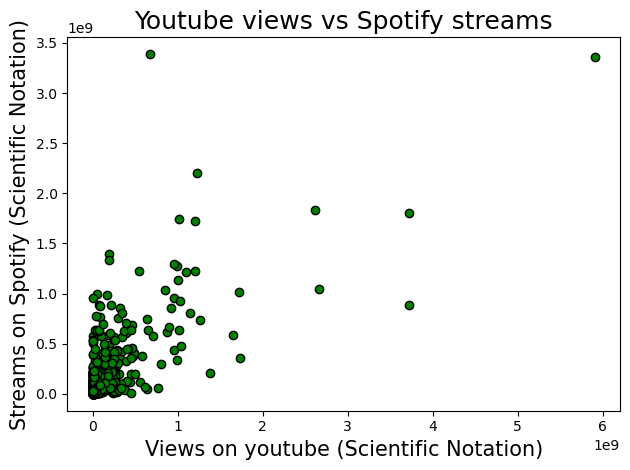

In [5]:
#Plots Youtube views vs Spotify Streams to see if there are many that do well in both or not
plt.scatter(combo_sample["Views"],combo_sample["Stream"],color = "g", edgecolors="black")
plt.xlabel("Views on youtube (Scientific Notation)",fontdict = {"fontsize":15})
plt.ylabel("Streams on Spotify (Scientific Notation)",fontdict = {"fontsize":15})
plt.title("Youtube views vs Spotify streams",fontdict = {"fontsize":18})
plt.tight_layout()
plt.show()

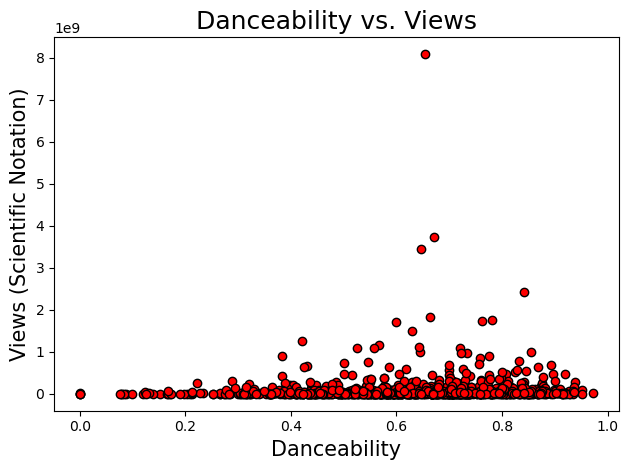

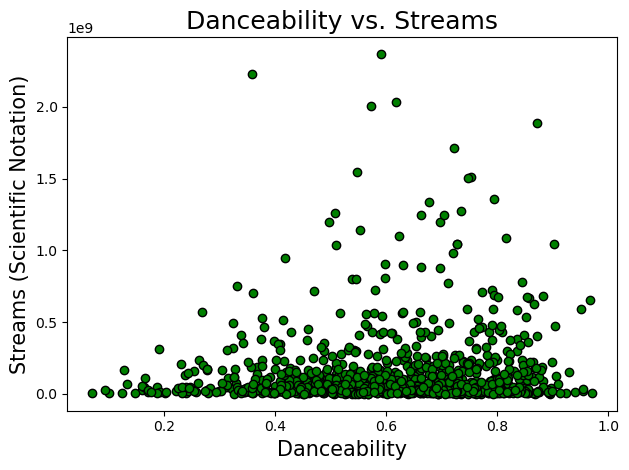

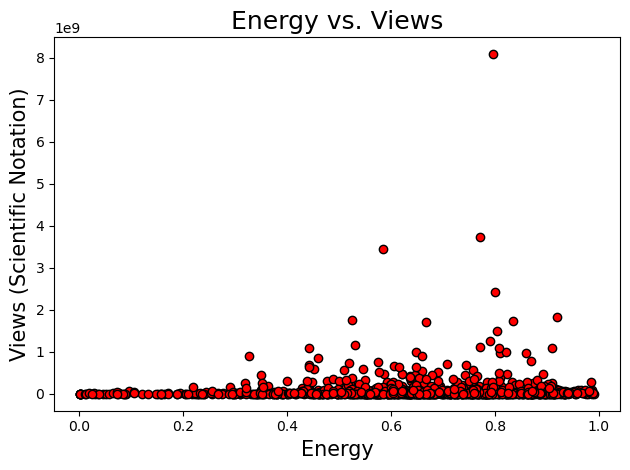

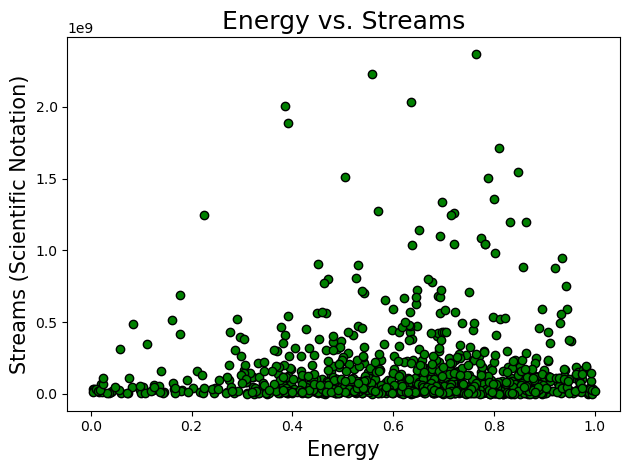

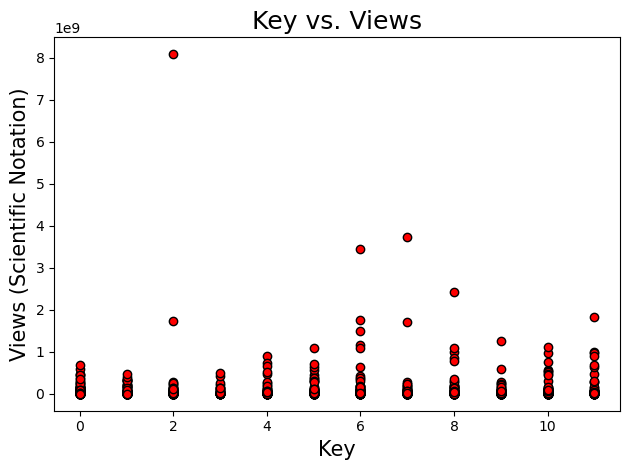

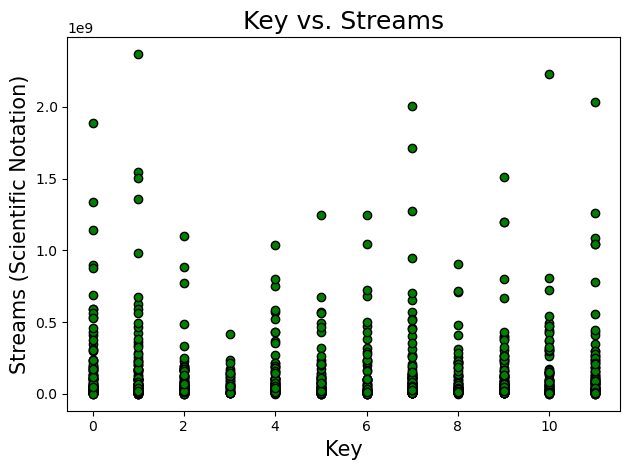

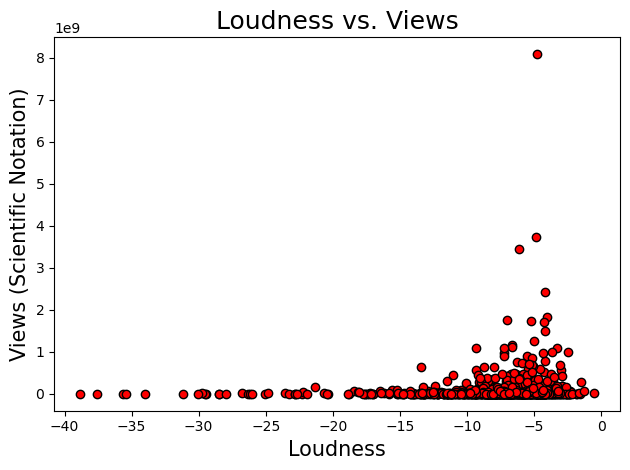

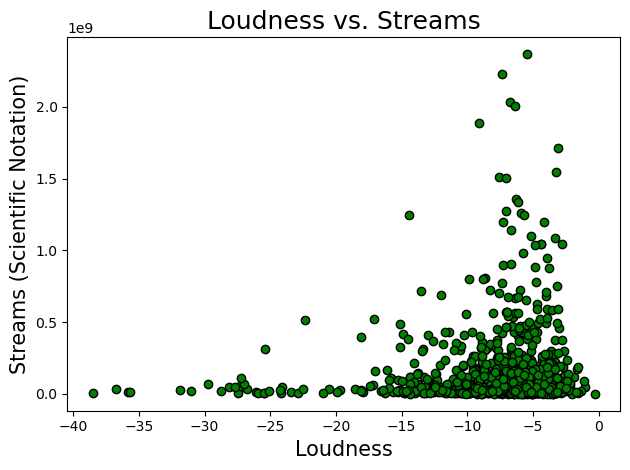

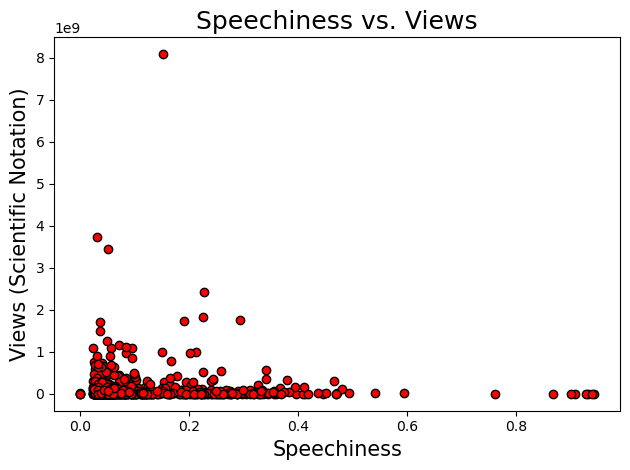

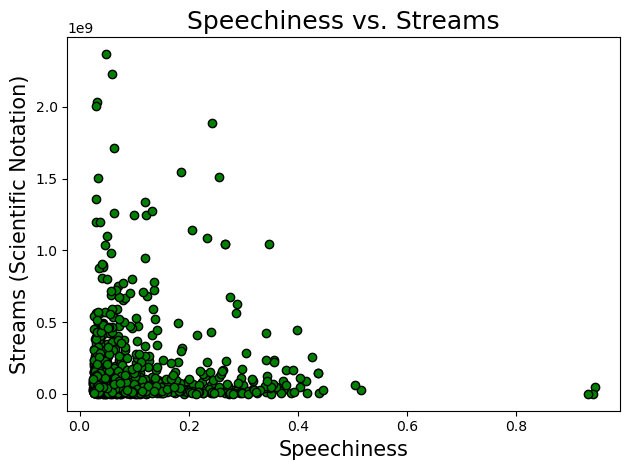

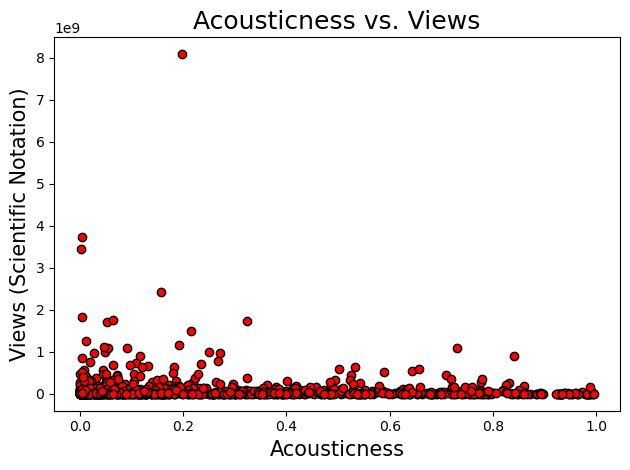

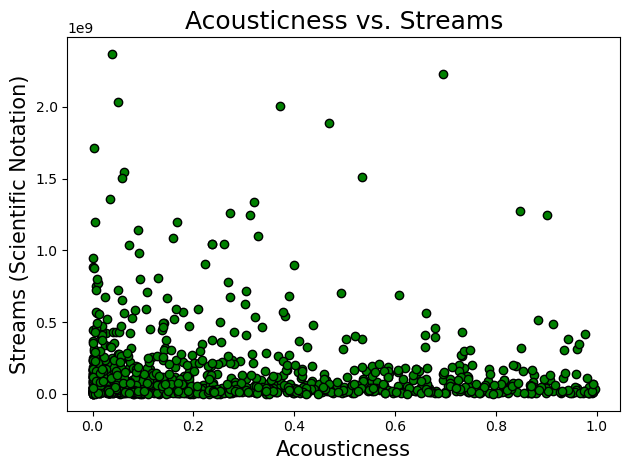

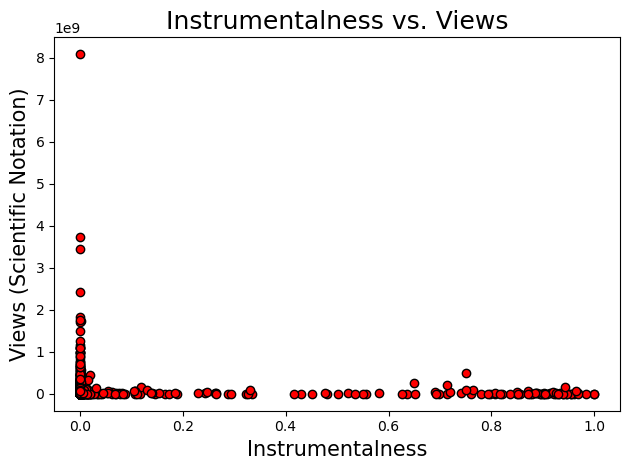

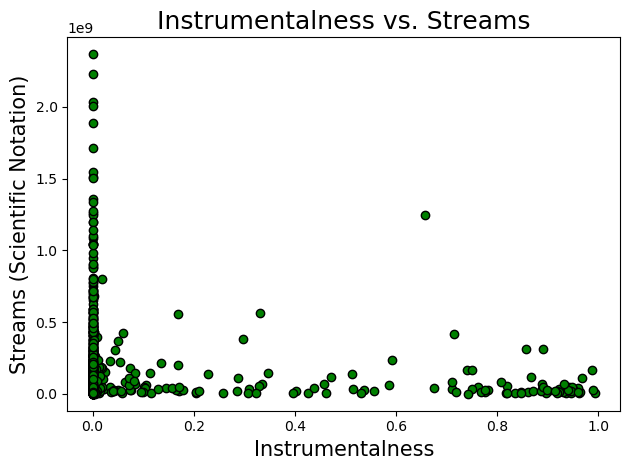

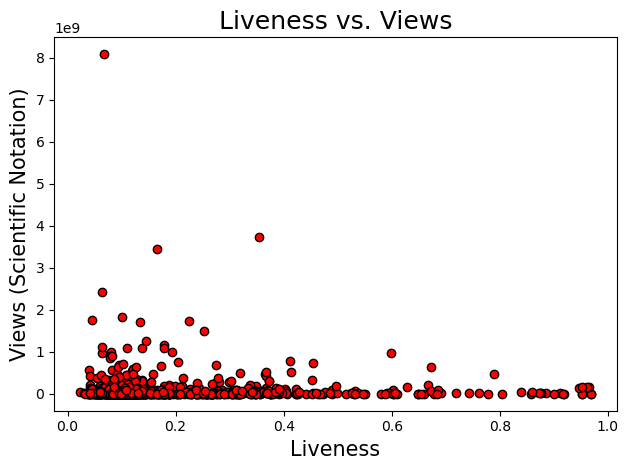

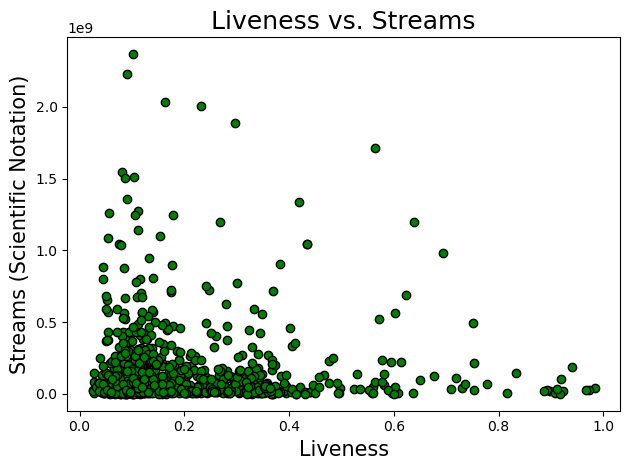

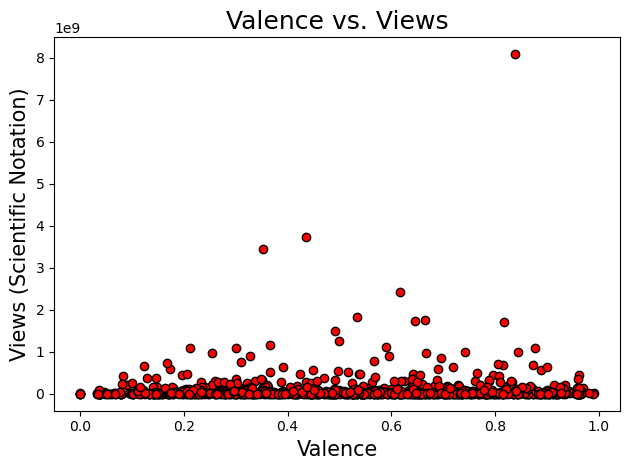

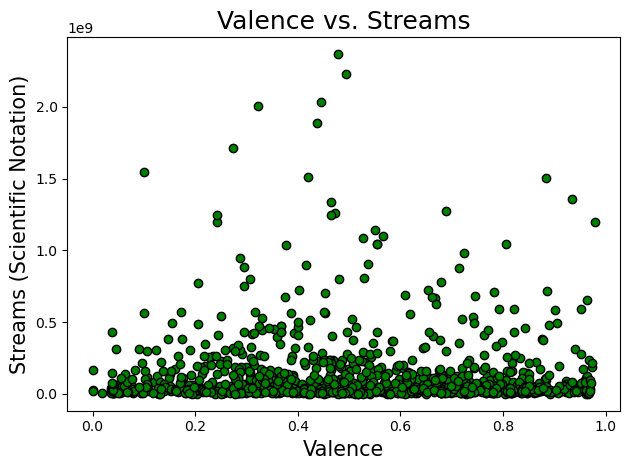

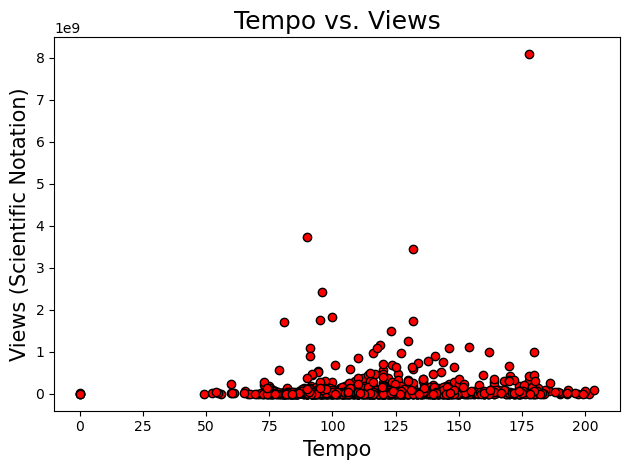

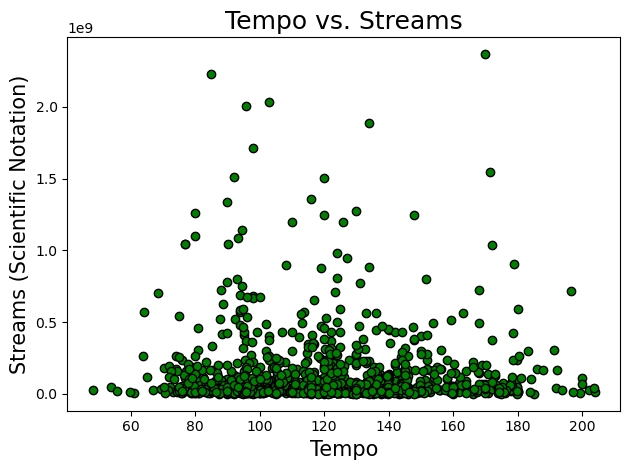

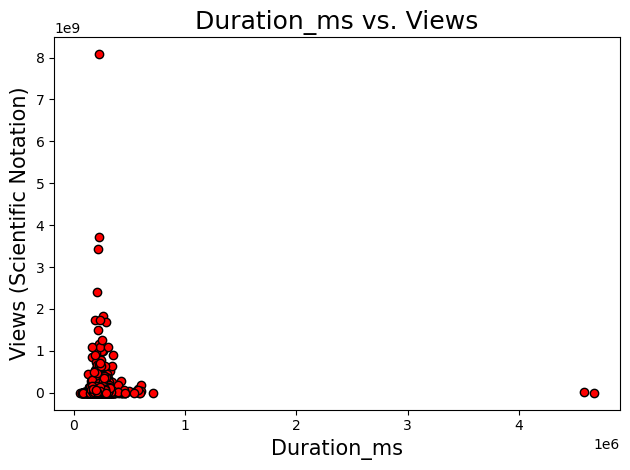

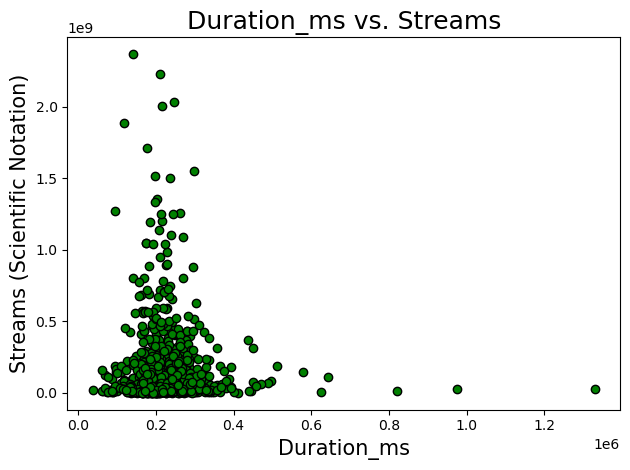

In [6]:
#indicates which variables we're going to plot against the youtube and spotify data
variables = ['Danceability','Energy','Key','Loudness','Speechiness','Acousticness','Instrumentalness','Liveness','Valence','Tempo','Duration_ms']
#produces all the scatter plots (blue is youtube, red is spotify)
for a in variables:
    youtube_plotting(a)
    spotify_plotting(a)

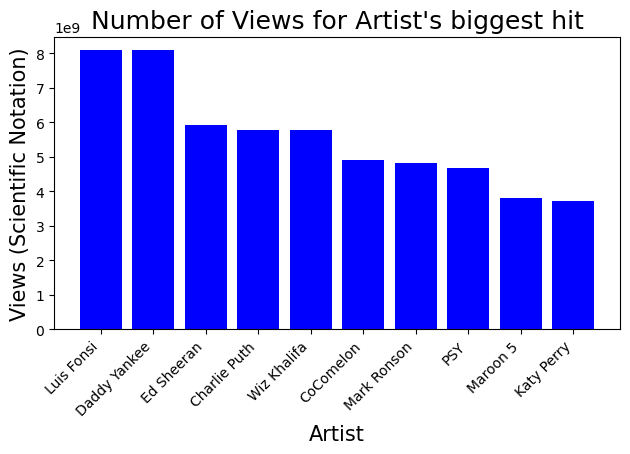

         Artist         Views
0    Luis Fonsi  8.079649e+09
1  Daddy Yankee  8.079647e+09
2    Ed Sheeran  5.908398e+09
3  Charlie Puth  5.773798e+09
4   Wiz Khalifa  5.773797e+09
5     CoComelon  4.898831e+09
6   Mark Ronson  4.821016e+09
7           PSY  4.679767e+09
8      Maroon 5  3.817733e+09
9    Katy Perry  3.725749e+09


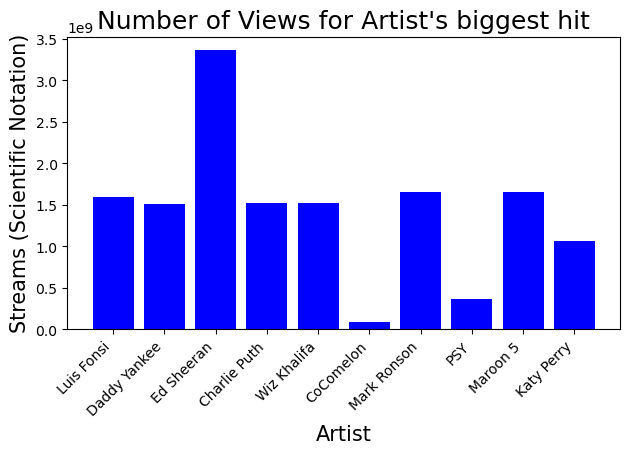

         Artist         Views
0    Luis Fonsi  8.079649e+09
1  Daddy Yankee  8.079647e+09
2    Ed Sheeran  5.908398e+09
3  Charlie Puth  5.773798e+09
4   Wiz Khalifa  5.773797e+09
5     CoComelon  4.898831e+09
6   Mark Ronson  4.821016e+09
7           PSY  4.679767e+09
8      Maroon 5  3.817733e+09
9    Katy Perry  3.725749e+09


In [7]:
#this plots the top 10 artists based on Views on youtube based on their top rated song and how it performed on youtube
max_views_df = data_df.groupby("Artist").max("Views")
max_views_df = max_views_df.sort_values("Views",ascending=False).head(10).reset_index()
plt.bar(max_views_df["Artist"],max_views_df["Views"],color="blue")
plt.xlabel("Artist",fontdict = {"fontsize":15})
plt.ylabel("Views (Scientific Notation)",fontdict = {"fontsize":15})
plt.xticks(ha = "right",rotation = 45)
plt.title("Number of Views for Artist's biggest hit",fontdict = {"fontsize":18})
plt.tight_layout()
plt.show()
print(max_views_df[["Artist","Views"]])
#this plot shows the top 10 artists based on Views and how those songs did on spotify (chosen for youtube data, ranked by spotify data)
plt.bar(max_views_df["Artist"],max_views_df["Stream"],color="blue")
plt.xlabel("Artist",fontdict = {"fontsize":15})
plt.ylabel("Streams (Scientific Notation)",fontdict = {"fontsize":15})
plt.xticks(ha = "right",rotation = 45)
plt.title("Number of Views for Artist's biggest hit",fontdict = {"fontsize":18})
plt.tight_layout()
plt.show()
print(max_views_df[["Artist","Views"]])

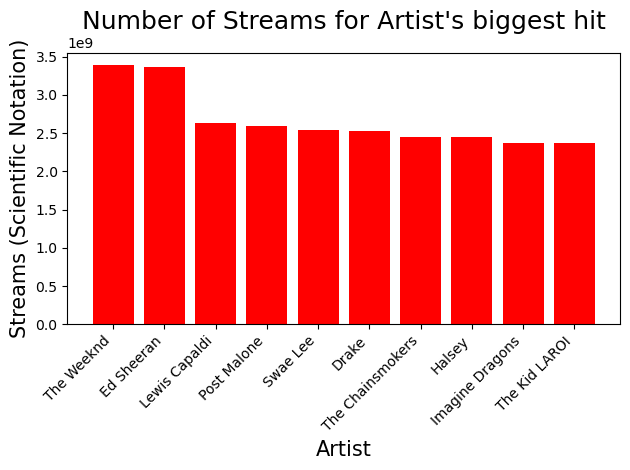

             Artist        Stream
0        The Weeknd  3.386520e+09
1        Ed Sheeran  3.362005e+09
2     Lewis Capaldi  2.634013e+09
3       Post Malone  2.594927e+09
4          Swae Lee  2.538330e+09
5             Drake  2.522432e+09
6  The Chainsmokers  2.456205e+09
7            Halsey  2.456205e+09
8   Imagine Dragons  2.369272e+09
9     The Kid LAROI  2.365778e+09


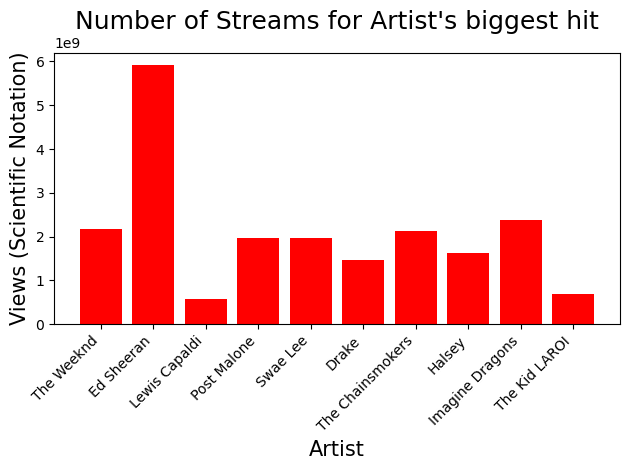

In [8]:
#this plots the top 10 artists based on Streams on spotify based on their top rated song and how it performed on spotify
max_streams_df = data_df.groupby("Artist").max("Stream")
max_streams_df = max_streams_df.sort_values("Stream",ascending=False).head(10).reset_index()
plt.bar(max_streams_df["Artist"],max_streams_df["Stream"],color = "red")
plt.xlabel("Artist",fontdict = {"fontsize":15})
plt.ylabel("Streams (Scientific Notation)",fontdict = {"fontsize":15})
plt.xticks(ha = "right",rotation = 45)
plt.title("Number of Streams for Artist's biggest hit",fontdict = {"fontsize":18})
plt.tight_layout()
plt.show()
print(max_streams_df[["Artist","Stream"]])
#this plot shows the top 10 artists based on Streams and how those songs did on youtube (chosen for spotify data, ranked by youtube data)
plt.bar(max_streams_df["Artist"],max_streams_df["Views"],color = "red")
plt.xlabel("Artist",fontdict = {"fontsize":15})
plt.ylabel("Views (Scientific Notation)",fontdict = {"fontsize":15})
plt.xticks(ha = "right",rotation = 45)
plt.title("Number of Streams for Artist's biggest hit",fontdict = {"fontsize":18})
plt.tight_layout()
plt.show()

In [80]:
# temp_data = data_df.groupby("Track").sum("Views")
# temp_data = temp_data[temp_data]
# temp_data.head(10).sort_values("Views",ascending=False)

In [81]:
#Looks at the correlation table for our data set
correlation1 = combo_df.corr()
correlation1

C:\Users\15037\AppData\Local\Temp\ipykernel_13740\2659655541.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation1 = combo_df.corr()


,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
Danceability,1.000000,0.238983,0.037923,0.358187,0.226339,-0.281674,-0.321571,-0.083001,0.463402,-0.062518,-0.089078,0.088334,0.098548,0.043504,0.072202
Energy,0.238983,1.000000,0.032205,0.745612,0.088574,-0.662292,-0.316602,0.173934,0.391306,0.155652,0.024803,0.067825,0.063353,0.045308,0.044864
Key,0.037923,0.032205,1.000000,0.027347,0.022090,-0.031408,0.001446,-0.008068,0.043053,0.002353,0.003029,0.009097,0.007854,0.007677,-0.007009
Loudness,0.358187,0.745612,0.027347,1.000000,0.068423,-0.552657,-0.555059,0.087248,0.315773,0.143336,0.012153,0.118683,0.123971,0.059215,0.119040
Speechiness,0.226339,0.088574,0.022090,0.068423,1.000000,-0.097796,-0.112319,0.066107,0.060188,0.051020,-0.048956,-0.009745,0.012367,0.010222,-0.016316
Acousticness,-0.281674,-0.662292,-0.031408,-0.552657,-0.097796,1.000000,0.281577,-0.052550,-0.203859,-0.130029,-0.026199,-0.071044,-0.079235,-0.053091,-0.104141
Instrumentalness,-0.321571,-0.316602,0.001446,-0.555059,-0.112319,0.281577,1.000000,-0.057190,-0.271424,-0.081409,-0.007307,-0.079686,-0.079920,-0.032008,-0.092058
Liveness,-0.083001,0.173934,-0.008068,0.087248,0.066107,-0.052550,-0.057190,1.000000,0.032282,0.008281,-0.000825,-0.016051,-0.022599,-0.012825,-0.037442
Valence,0.463402,0.391306,0.043053,0.315773,0.060188,-0.203859,-0.271424,0.032282,1.000000,0.091730,-0.050915,0.036922,0.012616,0.017893,-0.012786
Tempo,-0.062518,0.155652,0.002353,0.143336,0.051020,-0.130029,-0.081409,0.008281,0.091730,1.000000,-0.013808,-0.000800,0.002663,0.008040,0.002699


In [82]:
# prints the strongest correlations between Views/Likes and other variables we looked at.
print(f"Views and Danceability: {round(correlation1.iloc[0,11],5)}")
print(f"Views and Loudness: {round(correlation1.iloc[3,11],5)}")
print(f"Streams and Danceability: {round(correlation1.iloc[0,14],5)}")
print(f"Streams and Loudness: {round(correlation1.iloc[3,14],5)}")

Views and Danceability: 0.08833
Views and Loudness: 0.11868
Streams and Danceability: 0.0722
Streams and Loudness: 0.11904
